In [ ]:
import tensorflow as tf

In [ ]:
import keras

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
import time

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import cv2

In [ ]:
mnist=tf.keras.datasets.mnist#28*28image of handwritten of 0-9
(x_train,y_train),(x_test,y_test) =mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("training data shape is {}".format(x_train.shape))
print("training labels shape is {}".format(y_train.shape))
print("testing data shape is {}".format(x_test.shape))
print("testing labels shape is {}".format(y_test.shape))

training data shape is (60000, 28, 28)
training labels shape is (60000,)
testing data shape is (10000, 28, 28)
testing labels shape is (10000,)


In [ ]:
print("sample training data is {}".format(x_train[0]))

sample training data is [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

In [ ]:
print("sample training label is {}".format(y_train[0:5]))

sample training label is [5 0 4 1 9]


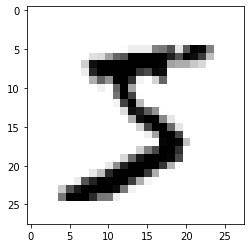

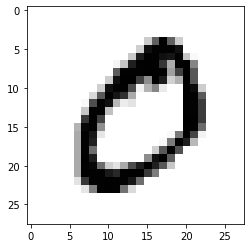

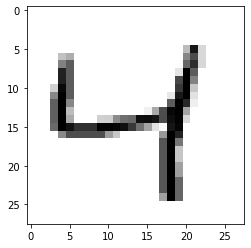

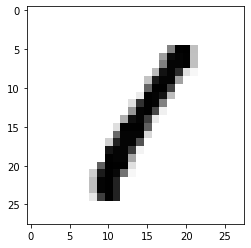

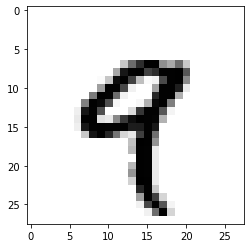

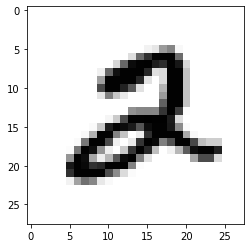

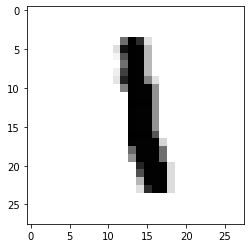

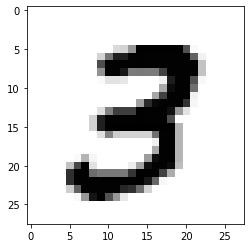

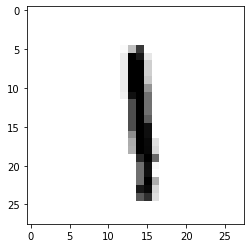

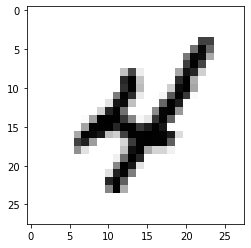

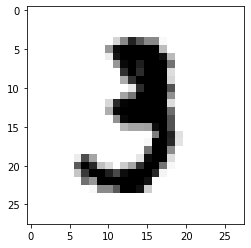

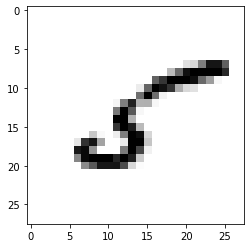

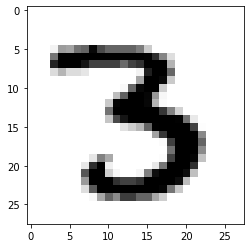

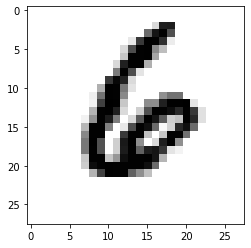

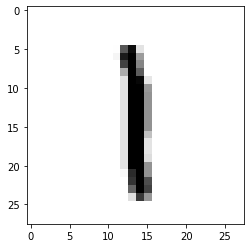

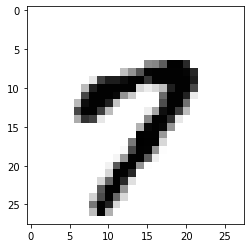

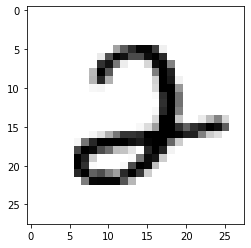

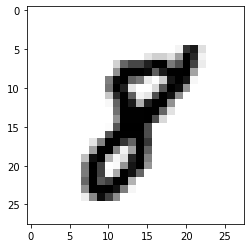

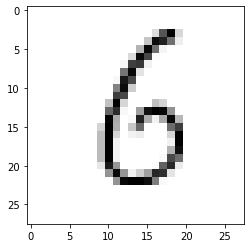

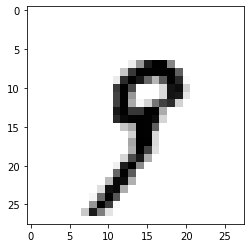

In [ ]:
for i in range(0,20):
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.show()

In [ ]:
x_train =tf.keras.utils.normalize(x_train,axis=1)
x_test =tf.keras.utils.normalize(x_test,axis=1)

In [ ]:
print("training data after normalizing is {}".format(x_train[0]))
print("testing data after normalizing is {}".format(x_test[0]))

training data after normalizing is [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       

In [ ]:
model =tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))# softmax for probability distribution
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics =['accuracy'])
model.fit(x_train,y_train,epochs=3)
predictions=model.predict([x_test])

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2581 - accuracy: 0.9243
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1072 - accuracy: 0.9665
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0740 - accuracy: 0.9766
Consider rewriting this model with the Functional API.


In [ ]:
 print("probability distribution for a multi-class classification")
 predictions[0]

probability distribution for a multi-class classification


array([1.1348574e-07, 2.2773380e-08, 7.3733918e-06, 5.1308375e-06,
       4.0011296e-09, 1.6408362e-07, 1.7537697e-11, 9.9998271e-01,
       2.9657992e-06, 1.4401960e-06], dtype=float32)

In [ ]:
print(np.argmax(predictions[0]))

7


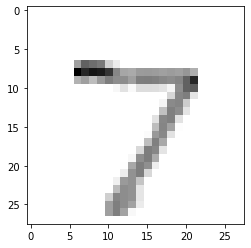

In [ ]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [ ]:
from IPython.display import display,Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg',quality=0.8):
  js =javascript('''
    async function takephoto(quality) {
      const div =document.createElement('div');
      const capture =document.createElement('button');
      capture.textcontent='capture';
      div.appendchild(capture);

      const video = document.createElement('video');
      video.style.display='block';
      const stream =await navigator.mediaDevices.getUsermedia({video:true}); 

      document.body.appendchild(div);
      div.appendchild(video);
      video.srcObject=stream;
      await video.play();

      //resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollheight,true);

      // wait for capture to be clicked.
      await new promise((resolve)=> capture.onclick=resolve);

      const canvas= document.createElement('canvas');
      canvas.width= video.videowidth;
      canvas.height=video.videohight;
      canvas.getcontext('2d').drawimage(video,0,0);
      stream.getvideotracks()[0].stop();
      div.remove();
      return canvas.todataURL('image/jpeg',quality);
    }
    ''')
  display(js)
  data = eval_js('takephoto({}))'.format(quality))
  binary =b64decode(data.split(',')[1])
  with open(filename,'wb')as f:
    f.write(binary)
    return filename 
    

                                    
  

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('saved to {}'.format(filename))

  #show the image which was just taken.
  display(image(filename))
except Exception as err:
  #errors will be thrown if the user does not have a webcam or if they do not
  #grant the page permission to access it.
  print(str(err))

name 'javascript' is not defined


In [ ]:
from PIL import Image
user_test = "filename"
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("bw_image.jpg")
bw
img_array = cv2.imread("bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
user_test = tf.keras.utils.normalize(new_array, axis = 1)
predicted = model.predict([[user_test]])
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))

FileNotFoundError: ignored

In [ ]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json